# Installing relevant libraries

In [ ]:
!pip install librosa scipy matplotlib

In [1]:
# These packages help with audio processing, and manipulation
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, find_peaks
from scipy.fft import fft, fftfreq

In [3]:
# Loading the audio files (files were uploaded to the Colab runtime)
wave_male, sr_male = librosa.load('/content/hood_m.wav', sr=None)
wave_female, sr_female = librosa.load('/content/head_f.wav', sr=None)

# Defining a 100 ms segment
segment_duration = 0.1  # 100 ms
segment_length = int(segment_duration * sr_male)
wave_male_segment = wave_male[:segment_length]
wave_female_segment = wave_female[:segment_length]


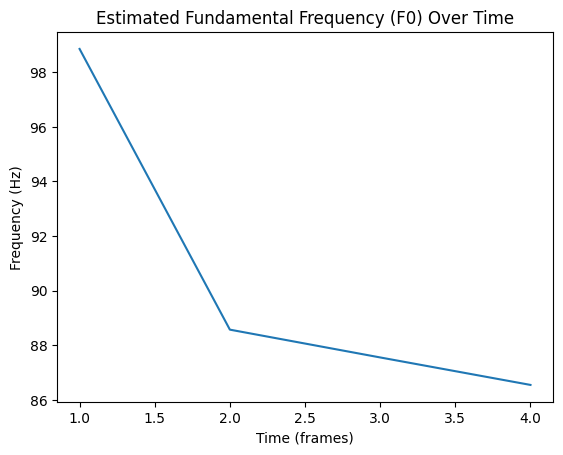

Mean F0: 90.38529279668211 Hz


In [4]:
# Estimating fundamental frequency F0 over the segment
f0, _, _ = librosa.pyin(wave_male_segment, fmin=50, fmax=300)
mean_f0 = np.nanmean(f0)  # Calculating the average F0

# Plotting F0 over time to verify it is steady
plt.plot(f0)
plt.title("Estimated Fundamental Frequency (F0) Over Time")
plt.xlabel("Time (frames)")
plt.ylabel("Frequency (Hz)")
plt.show()

print("Mean F0:", mean_f0, "Hz")


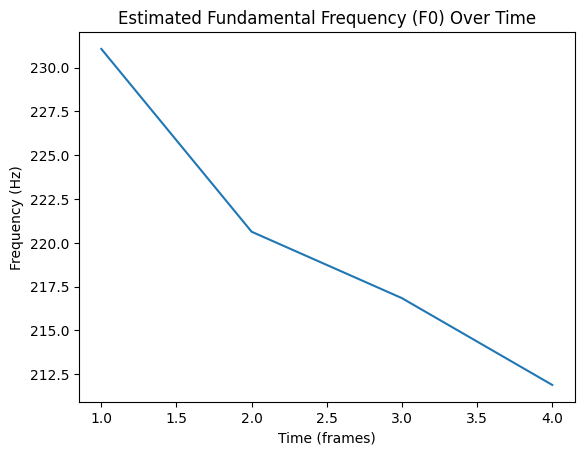

Mean F0: 220.11107418483667 Hz


In [5]:
# Estimating fundamental frequency F0 over the segment
f0, _, _ = librosa.pyin(wave_female_segment, fmin=50, fmax=300)
mean_f0 = np.nanmean(f0)  # Calculating the average F0

# Plotting F0 over time to verify it is steady
plt.plot(f0)
plt.title("Estimated Fundamental Frequency (F0) Over Time")
plt.xlabel("Time (frames)")
plt.ylabel("Frequency (Hz)")
plt.show()

print("Mean F0:", mean_f0, "Hz")

In [6]:
# Performing LPC analysis
lpc_order = 20  # Values I tried: 6, 10, 12, 16, 20 (20 yielded the best results)
lpc_coeffs_male = librosa.lpc(wave_male_segment, order=lpc_order)
lpc_coeffs_female = librosa.lpc(wave_female_segment, order=lpc_order)

print("LPC Coefficients (Male):", lpc_coeffs_male)
print("LPC Coefficients (Female):", lpc_coeffs_female)


LPC Coefficients (Male): [ 1.         -1.9350983   0.92710257  0.18115543  0.5787636  -0.9630006
 -0.49970615  1.0299262   0.1340037  -0.49314967  0.11836666 -0.6756392
  0.8471957   0.0628697  -0.29712206 -0.23197514 -0.02214745  0.6548884
 -0.36016995 -0.24053697  0.23156908]
LPC Coefficients (Female): [ 1.         -1.8590065   0.62031883  0.8342458  -0.27350786 -1.229781
  1.0737779   0.5208147  -0.99255276 -0.44528306  1.4744874  -0.4649402
 -0.7495101   0.35942298  0.9116488  -1.0745044   0.07393801  0.553972
 -0.09697665 -0.4755292   0.25895286]


## Yule-Walker method was tried as well, though the results were dissatisfactory, hence the following block is commented out

In [ ]:
# import numpy as np
# from statsmodels.regression.linear_model import yule_walker

# # Defining the LPC order
# lpc_order = 10

# # Estimating LPC coefficients using the Yule-Walker method
# rho_male, lpc_coeffs_yw_male = yule_walker(wave_male_segment, order=lpc_order)
# rho_female, lpc_coeffs_yw_female = yule_walker(wave_female_segment, order=lpc_order)

# print("LPC Coefficients using Yule-Walker method (male):", rho_male)
# print("LPC Coefficients using Yule-Walker method (female):", rho_female)


LPC Coefficients using Yule-Walker method (male): [ 1.84311621 -0.94497782 -0.22118144 -0.10965663  1.01098573 -0.66362184
 -0.16557464  0.17453401  0.34044048 -0.29868238]
LPC Coefficients using Yule-Walker method (female): [ 1.66322579 -0.24002431 -1.04748124  0.3097204   0.9315787  -0.59611644
 -0.31958557  0.22251882  0.38150132 -0.34177817]


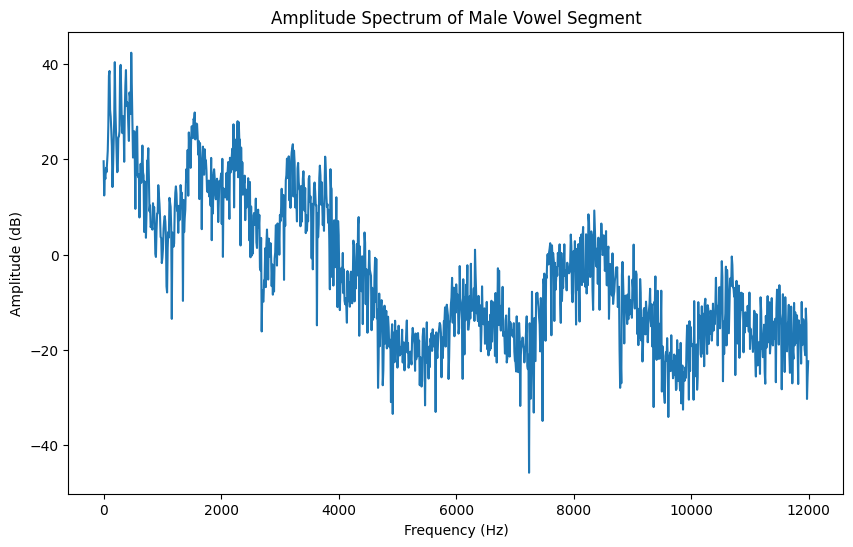

In [7]:
# Fourier Transform is performed for Amplitude Spectrum
wave_male = fft(wave_male_segment)
freqs_male = fftfreq(len(wave_male), 1/sr_male)
magnitude_male = np.abs(wave_male)[:len(wave_male)//2]

# Plotting Amplitude Spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs_male[:len(wave_male)//2], 20 * np.log10(magnitude_male))
plt.title("Amplitude Spectrum of Male Vowel Segment")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()


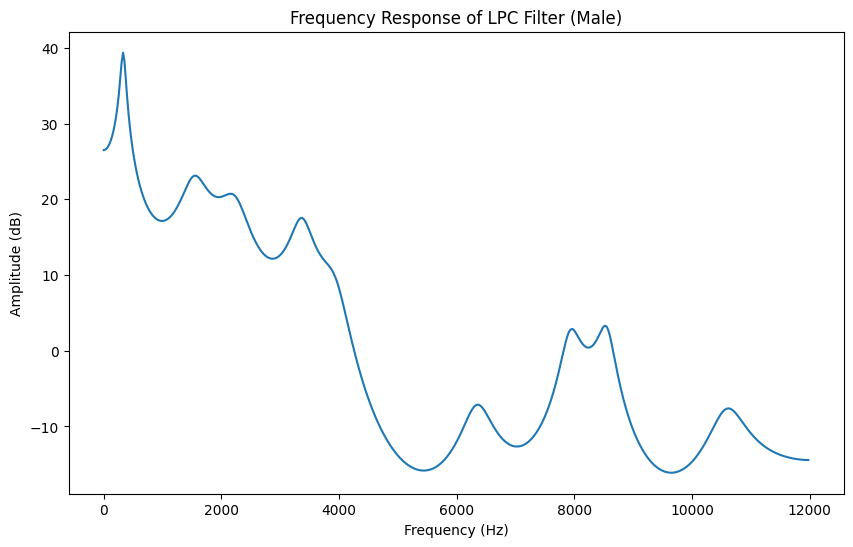

In [8]:
from scipy.signal import freqz

# Getting the frequency response of the LPC filter
w_male, h_male = freqz(1, lpc_coeffs_male, worN=512, fs=sr_male)
# w_male, h_male = freqz(1, rho_male, worN=512, fs=sr_male) (THIS WAS FOR THE YULE-WALKER METHOD)

# Plotting the LPC filter frequency response
plt.figure(figsize=(10, 6))
plt.plot(w_male, 20 * np.log10(abs(h_male)))
plt.title("Frequency Response of LPC Filter (Male)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()

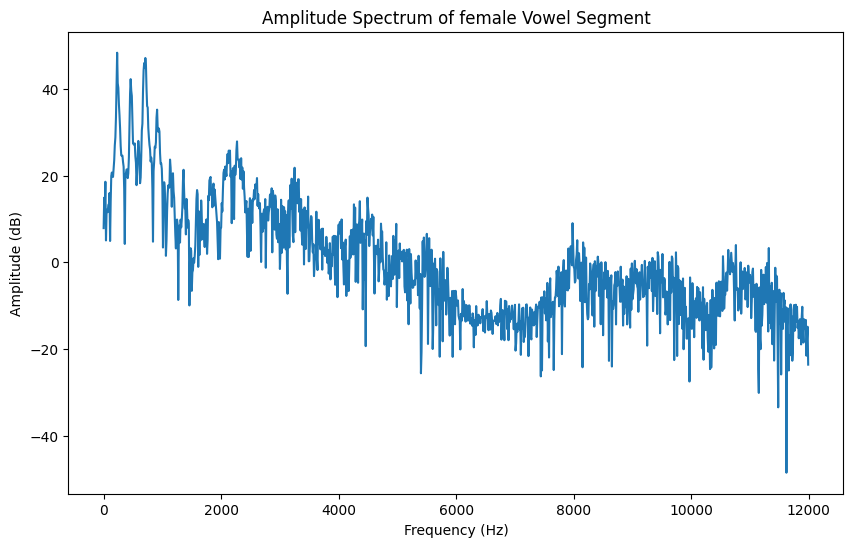

In [9]:
# Fourier Transform is performed for Amplitude Spectrum
wave_female = fft(wave_female_segment)
freqs_female = fftfreq(len(wave_female), 1/sr_female)
magnitude_female = np.abs(wave_female)[:len(wave_female)//2]

# Plotting Amplitude Spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs_male[:len(wave_female)//2], 20 * np.log10(magnitude_female))
plt.title("Amplitude Spectrum of female Vowel Segment")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()

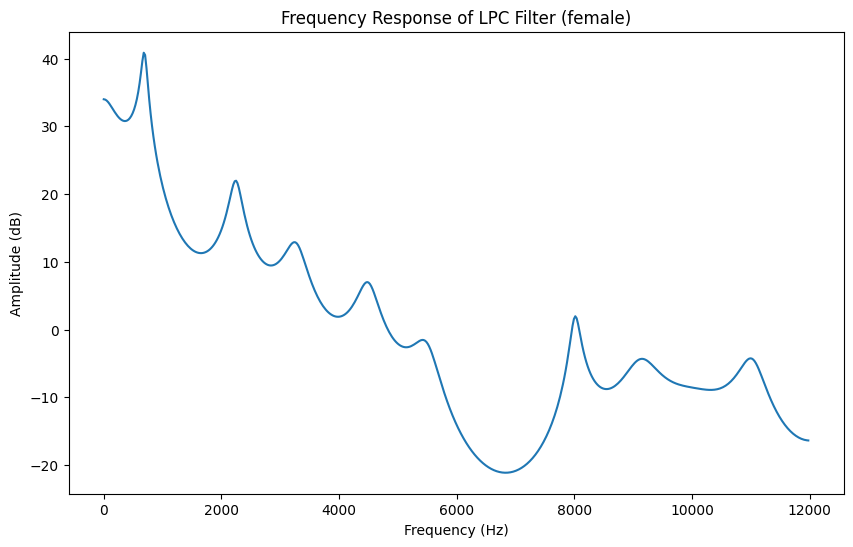

In [10]:
from scipy.signal import freqz

# Getting the frequency response of the LPC filter
w_female, h_female = freqz(1, lpc_coeffs_female, worN=512, fs=sr_female)
# w_female, h_female = freqz(1, rho_female, worN=512, fs=sr_female) (THIS WAS FOR THE YULE-WALKER METHOD)

# Plotting the LPC filter frequency response
plt.figure(figsize=(10, 6))
plt.plot(w_female, 20 * np.log10(abs(h_female)))
plt.title("Frequency Response of LPC Filter (female)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.show()

In [11]:
# Estimating formants for Male vowel
peaks_male, _ = find_peaks(20 * np.log10(abs(h_male)), height=-20)
formant_frequencies_male = w_male[peaks_male]
print("Estimated Formant Frequencies (Male):", formant_frequencies_male[:3])  # First three formants

# Estimating formants for Female vowel
peaks_female, _ = find_peaks(20 * np.log10(abs(h_female)), height=-20)
formant_frequencies_female = w_female[peaks_female]
print("Estimated Formant Frequencies (Female):", formant_frequencies_female[:3])  # First three formants


Estimated Formant Frequencies (Male): [ 328.125 1546.875 2156.25 ]
Estimated Formant Frequencies (Female): [ 679.6875 2250.     3234.375 ]


In [ ]:
# Estimating Fundamental Frequency (F0) - Male
f0_male, _, _ = librosa.pyin(wave_male_segment, fmin=50, fmax=300)
mean_f0_male = np.nanmean(f0_male)
print("Estimated Fundamental Frequency (F0) - Male:", mean_f0_male, "Hz")

# Estimating Fundamental Frequency (F0) - Female
f0_female, _, _ = librosa.pyin(wave_female_segment, fmin=50, fmax=300)
mean_f0_female = np.nanmean(f0_female)
print("Estimated Fundamental Frequency (F0) - Female:", mean_f0_female, "Hz")


Estimated Fundamental Frequency (F0) - Male: 90.38529279668211 Hz
Estimated Fundamental Frequency (F0) - Female: 220.11107418483667 Hz


In [ ]:
# FOR MALE
# Setting the fundamental period based on mean F0
fundamental_period_male = int(sr_male / mean_f0_male)

# Generating a 1-second impulse train with slight jitter
impulse_train_male = np.zeros(sr_male)
for i in range(0, len(impulse_train_male), fundamental_period_male):
    impulse_train_male[i] = 1  # Placing impulse
    jitter = np.random.randint(-2, 3)  # Slight jitter to add variability
    fundamental_period_male += jitter  # Adjusting period with slight randomness


# FOR FEMALE
# Setting the fundamental period based on mean F0
fundamental_period_female = int(sr_female / mean_f0_female)  # In samples

# Generating a 1-second impulse train with slight jitter
impulse_train_female = np.zeros(sr_female)
for i in range(0, len(impulse_train_female), fundamental_period_female):
    impulse_train_female[i] = 1  # Placing impulse
    jitter = np.random.randint(-2, 3)  # Slight jitter to add variability
    fundamental_period_female += jitter  # Adjusting period with slight randomness


In [ ]:
# Synthesising Male Vowel
synthesised_vowel_male = lfilter([1], lpc_coeffs_male, impulse_train_male)

# Synthesising Female Vowel
synthesised_vowel_female = lfilter([1], lpc_coeffs_female, impulse_train_female)


In [ ]:
# Normalising the synthesised sound to prevent clipping or excessive quietness
def normalise(signal):
    return signal / np.max(np.abs(signal))

# Apply normalisation
synthesised_vowel_male_normalised = normalise(synthesised_vowel_male)
synthesised_vowel_female_normalised = normalise(synthesised_vowel_female)


In [ ]:
from scipy.io.wavfile import write

# Saving synthesised sounds for listening
write('synthesised_vowel_male.wav', sr_male, synthesised_vowel_male.astype(np.float32))
write('synthesised_vowel_female.wav', sr_female, synthesised_vowel_female.astype(np.float32))

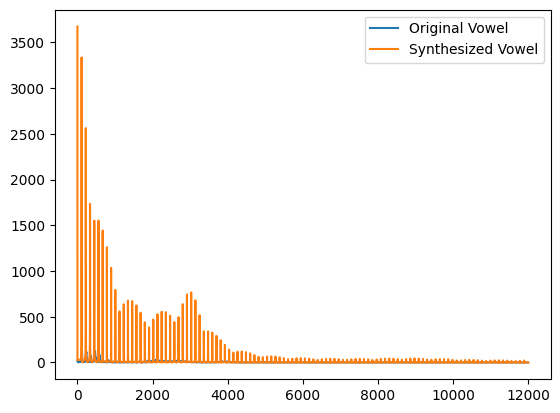

In [ ]:
# Plotting original vowel spectrum
Y_orig = np.fft.fft(wave_male_segment)
freqs_orig = np.fft.fftfreq(len(Y_orig), 1/sr_male)
plt.plot(freqs_orig[:len(Y_orig)//2], np.abs(Y_orig)[:len(Y_orig)//2], label='Original Vowel')

# Generating frequencies for synthesised sound based on its length
Y_synth = np.fft.fft(synthesized_vowel_male)
freqs_synth = np.fft.fftfreq(len(Y_synth), 1/sr_male)
plt.plot(freqs_synth[:len(Y_synth)//2], np.abs(Y_synth)[:len(Y_synth)//2], label='Synthesized Vowel')

plt.legend()
plt.show()




---



## Another attermpt is shown below, due to inadequate results, it was not used

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import lfilter, find_peaks
from scipy.linalg import toeplitz, solve
from statsmodels.regression.linear_model import yule_walker

LPC Coefficients using librosa method: [ 1.         -1.6444639   0.32984063  0.77499    -0.2314333  -0.67705053
  0.4308019   0.21042565 -0.12232721 -0.39093056  0.44496667 -0.07191055
 -0.01989898]


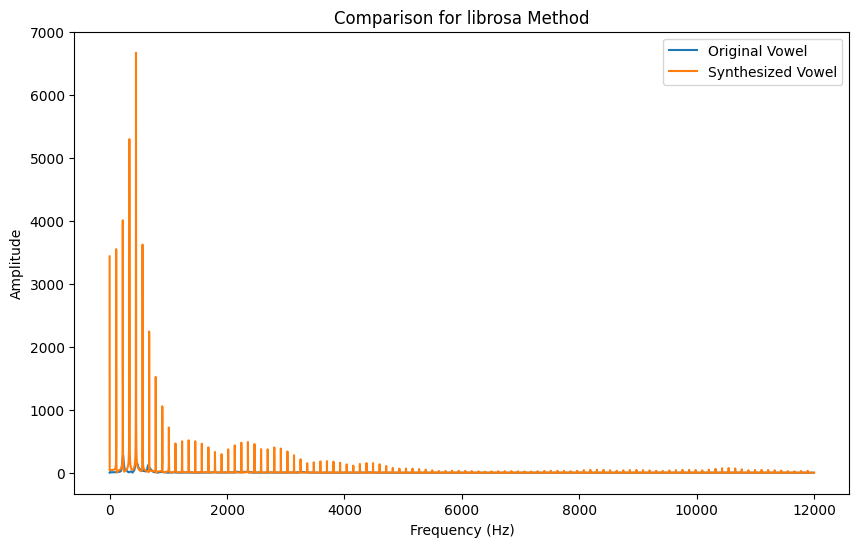

Yule-Walker returned a scalar. Converting to array.
Yule-Walker rho: [ 1.74146382 -0.297219   -1.13682447  0.36739853  1.12242562 -0.80350036
 -0.47282095  0.49006012  0.51603738 -0.78408203  0.17139523  0.0609819 ]
Yule-Walker coeffs: [0.0247318]
LPC Coefficients using yule_walker method: [ 1.        -0.0247318]


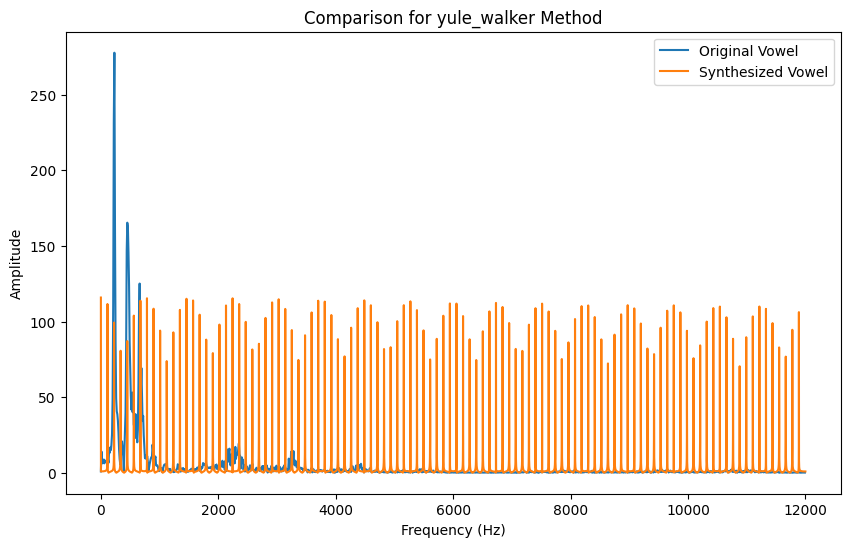

LPC Coefficients using covariance method: [ 1.         -1.63909602  0.33127749  0.75798976 -0.22785811 -0.65672207
  0.42142084  0.19323844 -0.11148808 -0.37778375  0.43158695 -0.07308306
 -0.01599655]


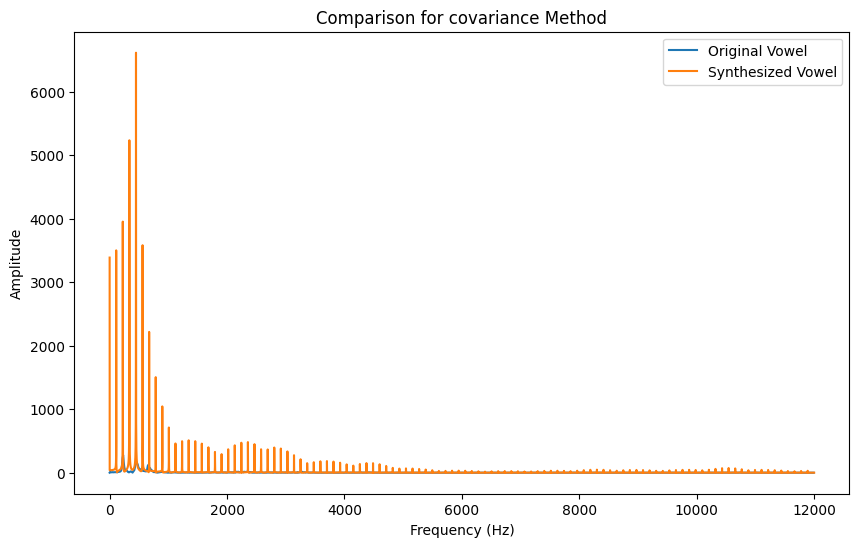

In [ ]:

# Step 1: Load Audio and Segment it
def load_audio(file_path, duration_ms, sr=None):
    y, sr = librosa.load(file_path, sr=sr)
    segment_length = int((duration_ms / 1000) * sr)
    return y[:segment_length], sr

# Step 2: Estimate LPC Coefficients
import numpy as np
from statsmodels.regression.linear_model import yule_walker

def estimate_lpc_coeffs(signal, order, method="librosa"):
    if method == "librosa":
        return librosa.lpc(signal, order=order)
    elif method == "yule_walker":
        try:
            # Estimate coefficients using Yule-Walker method
            rho, coeffs = yule_walker(signal, order=order)

            # Debug: Check if coeffs is a scalar and convert to array if needed
            if np.isscalar(coeffs):
                print("Yule-Walker returned a scalar. Converting to array.")
                coeffs = np.array([coeffs])

            # Additional Debugging: Print coefficients shape and content
            print("Yule-Walker rho:", rho)
            print("Yule-Walker coeffs:", coeffs)

            if coeffs.size == 0:
                raise ValueError("Yule-Walker returned an empty coefficients array")

            # Return with a leading 1 for LPC format consistency
            return np.concatenate(([1], -coeffs))  # Match librosa's output format
        except Exception as e:
            print("Error in Yule-Walker calculation:", e)
            print("Signal length:", len(signal), "Order:", order)
            raise
    elif method == "covariance":
        # Estimate coefficients using the covariance method
        r = np.correlate(signal, signal, mode='full')[len(signal)-1:len(signal)+order]
        R = toeplitz(r[:-1])
        rhs = -r[1:]
        coeffs = solve(R, rhs)
        return np.concatenate(([1], coeffs))
    else:
        raise ValueError("Invalid method specified. Choose 'librosa', 'yule_walker', or 'covariance'.")




# Step 3: Generate Impulse Train
def generate_impulse_train(f0, duration, sr):
    fundamental_period = int(sr / f0)
    impulse_train = np.zeros(duration)
    for i in range(0, duration, fundamental_period):
        impulse_train[i] = 1
    return impulse_train

# Step 4: Synthesize Vowel Sound using LPC Filter
def synthesize_vowel(lpc_coeffs, impulse_train):
    return lfilter([1], lpc_coeffs, impulse_train)

# Step 5: Plot Frequency Spectrum for Comparison
def plot_frequency_spectrum(original_signal, synthesized_signal, sr, title="Frequency Spectrum Comparison"):
    Y_orig = np.fft.fft(original_signal)
    freqs_orig = np.fft.fftfreq(len(Y_orig), 1 / sr)
    Y_synth = np.fft.fft(synthesized_signal)
    freqs_synth = np.fft.fftfreq(len(Y_synth), 1 / sr)

    plt.figure(figsize=(10, 6))
    plt.plot(freqs_orig[:len(Y_orig)//2], np.abs(Y_orig[:len(Y_orig)//2]), label='Original Vowel')
    plt.plot(freqs_synth[:len(Y_synth)//2], np.abs(Y_synth[:len(Y_synth)//2]), label='Synthesized Vowel')
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

# Main Function to Run All Steps
def main(file_path, f0, duration_ms, lpc_order, method="librosa"):
    # Load and segment the audio
    y_segment, sr = load_audio(file_path, duration_ms)

    # Estimate LPC coefficients using the specified method
    lpc_coeffs = estimate_lpc_coeffs(y_segment, order=lpc_order, method=method)
    print(f"LPC Coefficients using {method} method:", lpc_coeffs)

    # Generate impulse train
    impulse_train = generate_impulse_train(f0, sr, sr)

    # Synthesize the vowel
    synthesized_vowel = synthesize_vowel(lpc_coeffs, impulse_train)

    # Plot frequency spectrum for comparison
    plot_frequency_spectrum(y_segment, synthesized_vowel, sr, title=f"Comparison for {method} Method")

    return sr, synthesized_vowel

# Run the main function with different LPC methods
file_path = "/content/head_f.wav"
duration_ms = 100  # Segment length in milliseconds
lpc_order = 12
f0 = 111.7

# Try different methods
sr, synthesized_vowel_librosa = main(file_path, f0, duration_ms, lpc_order, method="librosa")
sr, synthesized_vowel_yw = main(file_path, f0, duration_ms, lpc_order, method="yule_walker")
sr, synthesized_vowel_cov = main(file_path, f0, duration_ms, lpc_order, method="covariance")


In [ ]:
from scipy.io.wavfile import write

# Save the synthesized sounds
write('synthesized_vowel_librosa.wav', sr, synthesized_vowel_librosa.astype(np.float32))
write('synthesized_vowel_yule_walker.wav', sr, synthesized_vowel_yw.astype(np.float32))
write('synthesized_vowel_covariance.wav', sr, synthesized_vowel_cov.astype(np.float32))


In [ ]:
from scipy.signal import butter, filtfilt

def low_pass_filter(signal, sr, cutoff=4000):
    b, a = butter(2, cutoff / (sr / 2), btype='low')
    return filtfilt(b, a, signal)

# Apply the low-pass filter to the synthesized signals
synthesized_vowel_librosa_filtered = low_pass_filter(synthesized_vowel_librosa, sr)
synthesized_vowel_cov_filtered = low_pass_filter(synthesized_vowel_cov, sr)

write('synthesized_vowel_librosa_lp.wav', sr, synthesized_vowel_librosa.astype(np.float32))
write('synthesized_vowel_covariance_lp.wav', sr, synthesized_vowel_cov.astype(np.float32))
